In [486]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from geopy.geocoders import Nominatim
from matplotlib.animation import FuncAnimation, PillowWriter

In [461]:
df = pd.read_csv('Clean_Data.csv')
df.drop("Unnamed: 0",axis =1,inplace=True)
df["City"] = df["City"].str.lower()

In [462]:
df.head()

,Name,Inspection_Date,Description,City,Longitude,Latitude,Inspection_Type,Inspection_Score,Inspection_Result,Inspection_Closed_Business,Violation_Type,Violation_Description,Violation_Points,Business_ID,Grade,Year,Month,day_of_week,Season
0,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,seattle,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,1.0,2022,8,Wednesday,Summer
1,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,seattle,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,1.0,2022,8,Wednesday,Summer
2,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,seattle,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0,2022,1,Thursday,Winter
3,#807 TUTTA BELLA,2021-01-06,Seating 0-12 - Risk Category III,seattle,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0,2021,1,Wednesday,Winter
4,+MAS CAFE,2022-07-13,Seating 0-12 - Risk Category III,seattle,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,Green,No_violation,0,PR0046367,2.0,2022,7,Wednesday,Summer


Text(0.5, 1.0, 'Map')

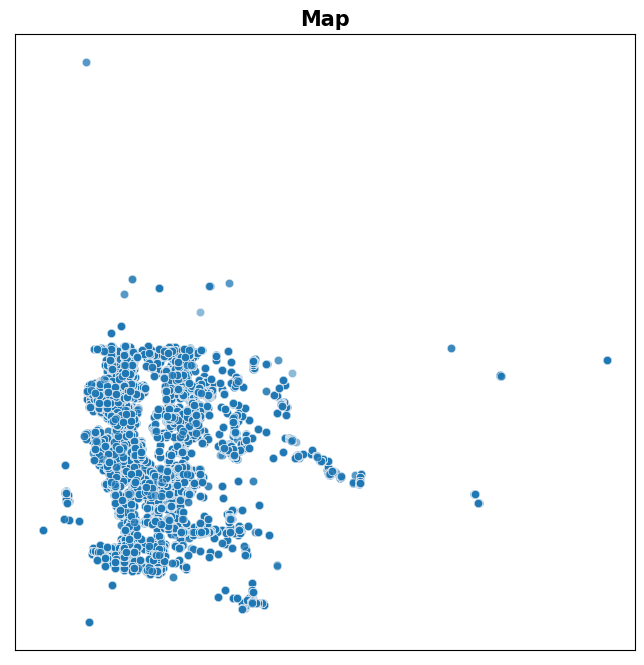

In [463]:
#df_geo = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.Longitude,df.Latitude))
#df_geo.plot(figsize = (8, 8), legend= True)
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude,alpha = 0.5)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Map', size = 15, weight = 'bold')

Text(0.5, 1.0, 'All cities')

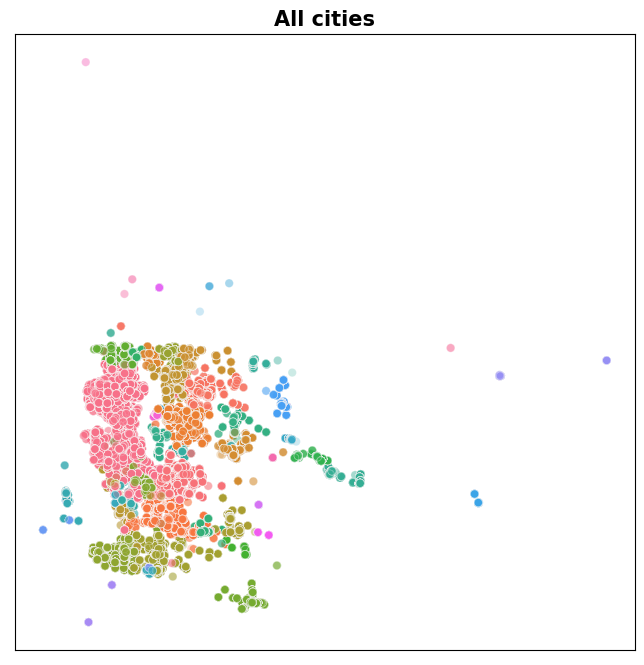

In [251]:
#df_geo = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.Longitude,df.Latitude))
#df_geo.plot(column="City" ,figsize = (8, 8),cmap = "Greens")
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["City"],alpha = 0.25,legend = False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('All cities', size = 15, weight = 'bold')

Text(0.5, 1.0, 'Inspection Type')

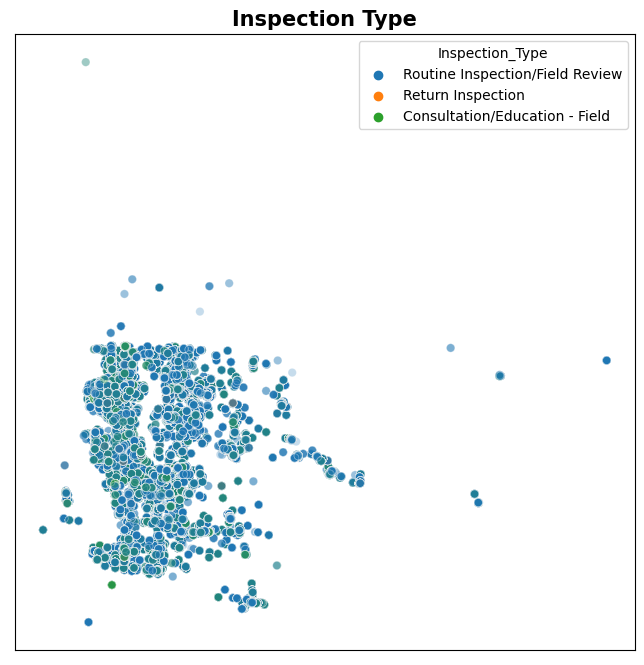

In [256]:
#df_geo.plot(column="Inspection_Type" ,figsize = (8, 8), legend= True)
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Inspection_Type"],alpha = 0.25)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Inspection Type', size = 15, weight = 'bold')

Text(0.5, 1.0, 'Inspection Score')

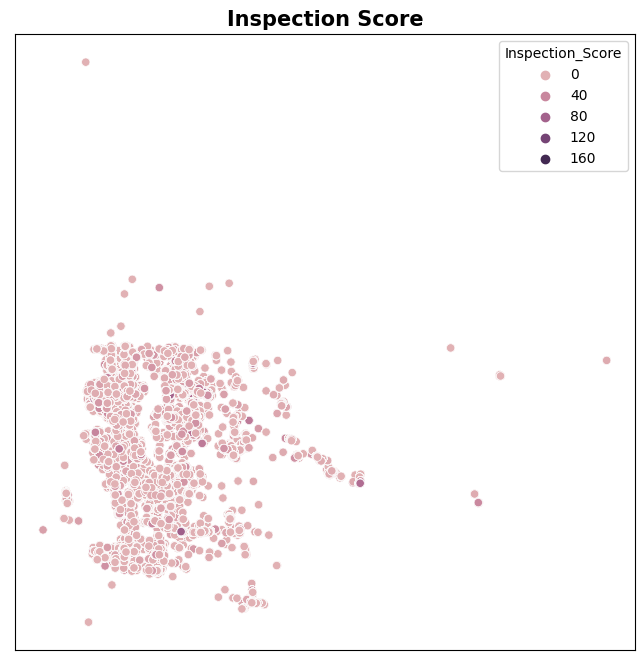

In [257]:
#df_geo.plot(column="Inspection_Score" ,figsize = (8, 8),vmax = 30, vmin= 0 ,legend= True)
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Inspection_Score"],alpha = 1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Inspection Score', size = 15, weight = 'bold')

Text(0.5, 1.0, 'Violation Type')

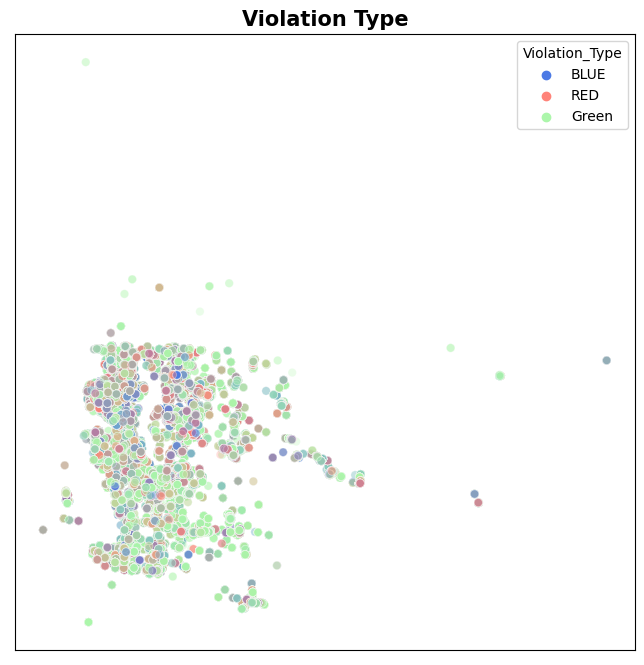

In [258]:
pallete = {"RED":"#FF8379" , "Green" : "#ACF6AB" , "BLUE" : "#4C7AE5"}
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Violation_Type"],alpha = 0.25,palette=pallete)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Violation Type', size = 15, weight = 'bold')

<AxesSubplot: >

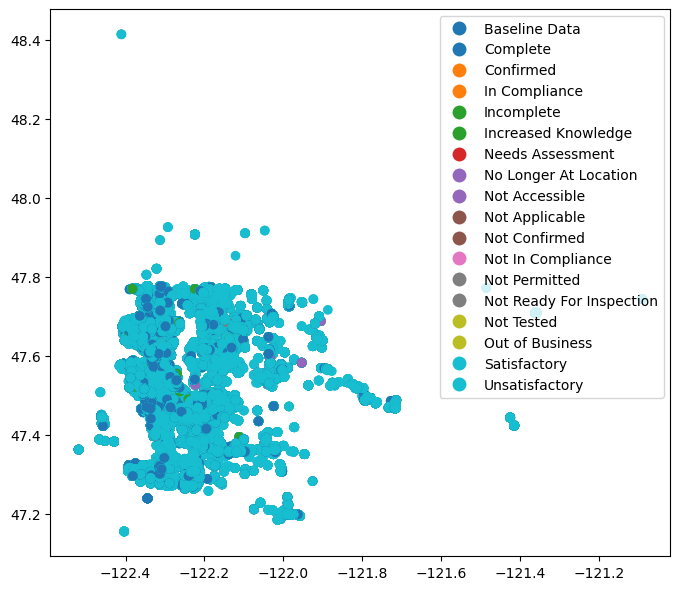

In [264]:
df_geo.plot(column="Inspection_Result",figsize = (8, 8), legend= True)

Text(0.5, 1.0, 'Inspection Result')

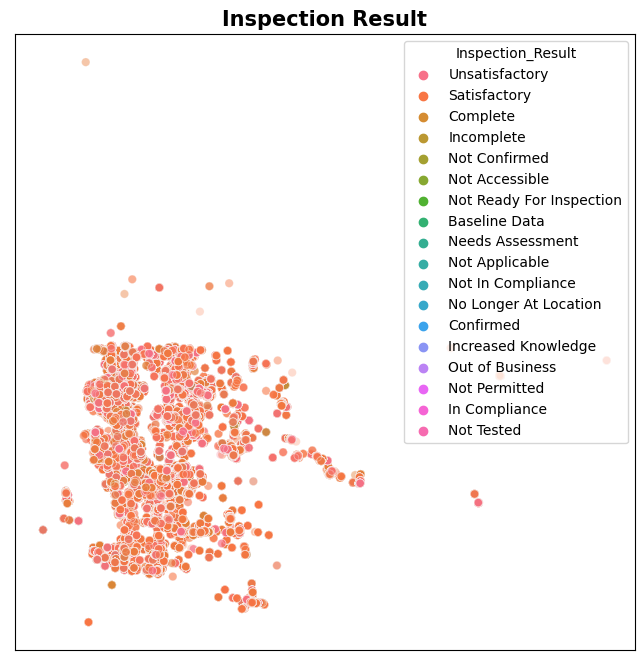

In [260]:
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Inspection_Result"],alpha = 0.25)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Inspection Result', size = 15, weight = 'bold')

Text(0.5, 1.0, 'Closed Business')

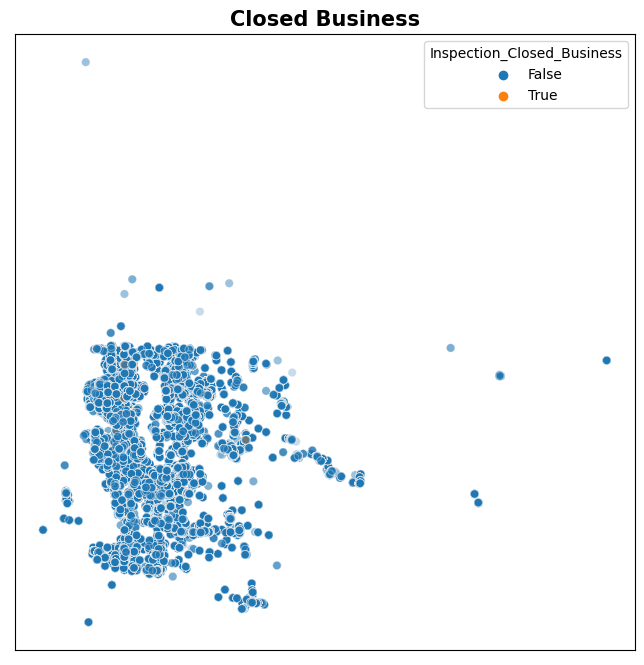

In [261]:
#df_geo.plot(column="Inspection_Closed_Business" ,figsize = (8, 8), legend= True)
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Inspection_Closed_Business"],alpha = 0.25)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Closed Business', size = 15, weight = 'bold')

<AxesSubplot: >

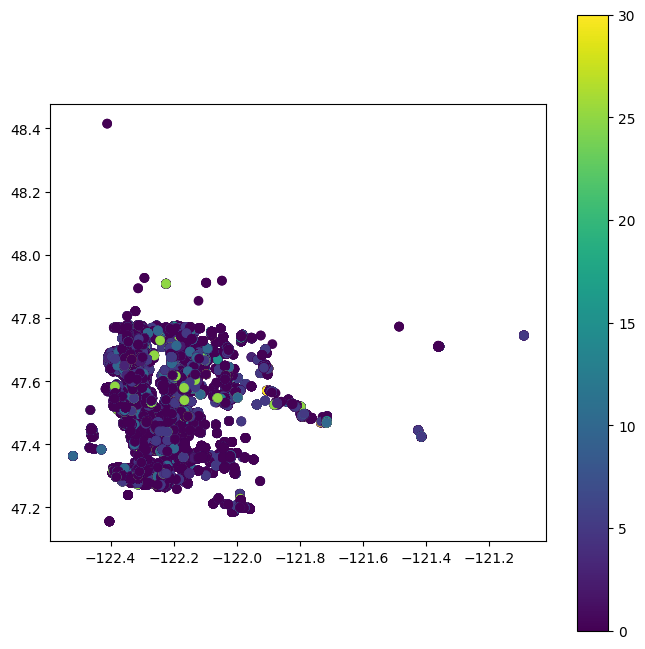

In [263]:
df_geo.plot(column="Violation_Points" ,figsize = (8, 8), legend= True)

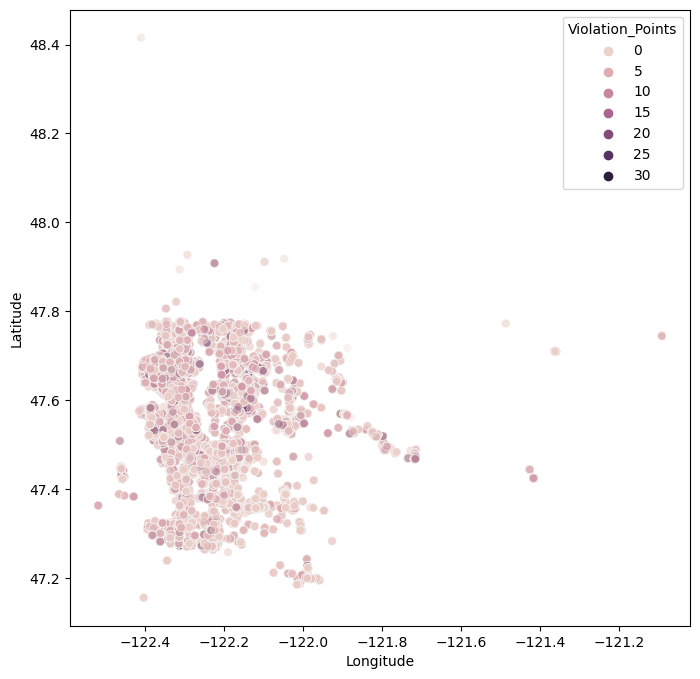

In [128]:
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Violation_Points"],alpha = 0.25)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Violation Points', size = 15, weight = 'bold')

<AxesSubplot: >

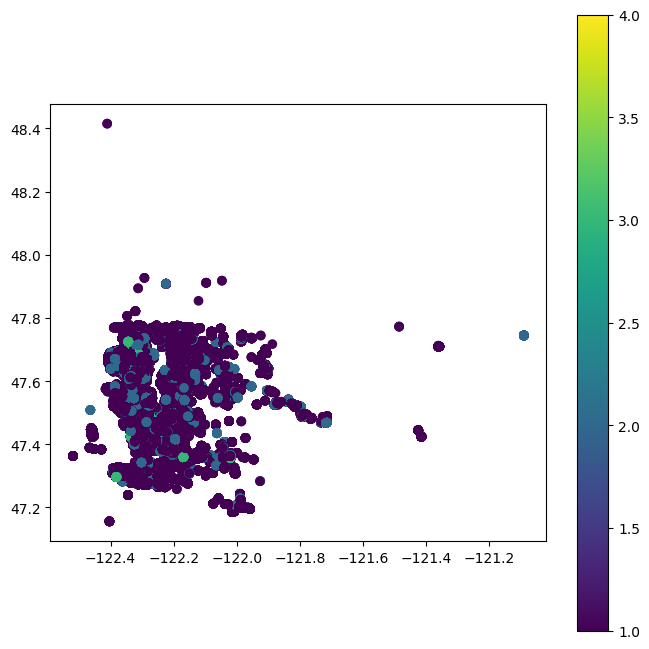

In [130]:
df_geo.plot(column="Grade" ,figsize = (8, 8), legend= True)

Text(0.5, 1.0, 'Grade')

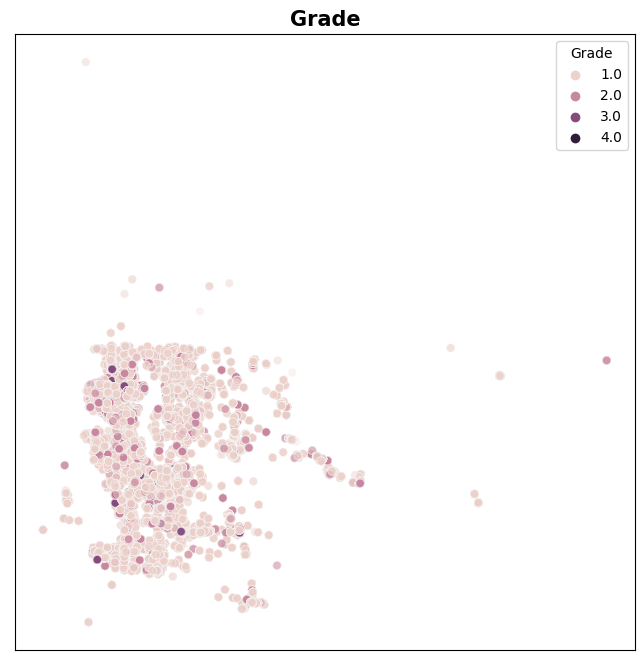

In [544]:
#df_geo.plot(column="Grade" ,figsize = (8, 8), legend= True)
fig,ax = plt.subplots(1,1,figsize = (8,8) ,dpi = 100)
ax = sns.scatterplot(x = df_geo.Longitude, y= df_geo.Latitude, hue = df_geo["Grade"],alpha = 0.25)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Grade', size = 15, weight = 'bold')